In [3]:
# import machine learning and data science libarires
import pandas as pd
import numpy as np

# import Google Finance API libraries
from googlefinance.client import get_price_data

# import data visualization libraries
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.rcParams['figure.figsize'] = (15, 5)

# import other libraries
import datetime as dt
import time

In [216]:
# set all the tickers: choose between: 'AAPL', 'MSFT', AMZN'
my_ticker = 'AAPL'

# set all the parameters
my_params = {
'q': my_ticker,    #stock symbol (ex: "AAPL")
'i': "86400",      #interval size in seconds ("86400" = 1 day intervals)
'x': "INDEXNASD",  #stock exchange symbol on which stock is traded (ex: "NASD")
'p': "5Y"          #period (ex: "1Y" = 1 year)
}

# build the dataframe of the stock data
my_stck = get_price_data(my_params)

# reset the indexes
#my_stck = my_stck.reset_index()

# print the head of my dataframe
print(my_stck.head())

                        Open     High      Low    Close     Volume
2012-10-18 16:00:00  91.3700  91.7200  90.0000  90.3800  119155512
2012-10-19 16:00:00  90.1500  90.2500  87.0900  87.1200  186021017
2012-10-22 16:00:00  87.4900  90.7700  87.2500  90.5800  136682392
2012-10-23 16:00:00  90.1429  90.5571  87.3857  87.6222  176786197
2012-10-24 16:00:00  88.7800  89.5100  87.2300  88.1200  139631772


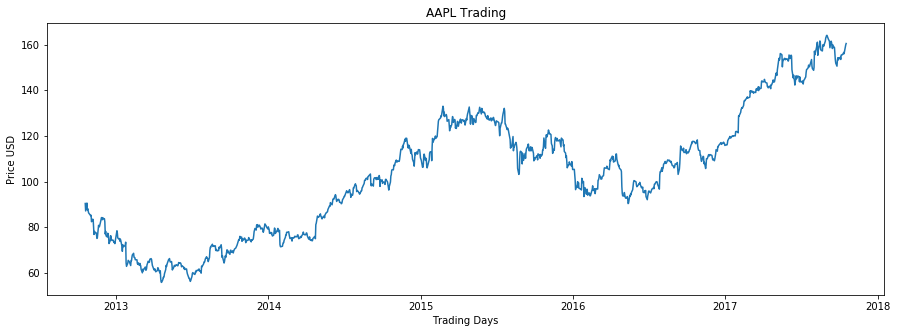

In [217]:
# plot data
fig, ax = plt.subplots()
ax.plot(my_stck.index, my_stck['Close'])

# format the y-crd label
price = lambda y : '$%1.2f' % y
ax.format_ydata = price

# format the x-crd label
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.set_title(my_ticker + ' Trading')

# set labels
plt.ylabel('Price USD')
plt.xlabel('Trading Days')

plt.show()

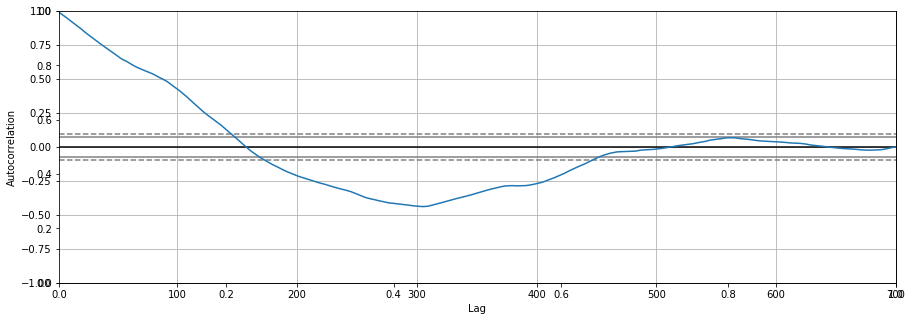

In [294]:
# my_series
my_series = my_stck['Close'][-700:]

#
from pandas.plotting import autocorrelation_plot as acf_pl
plt.subplots()

acf_pl(my_series)
plt.show()

#
#from statsmodels.graphics.tsaplots import plot_acf as acf_pl2
#acf_pl2(my_series)
#plt.show()

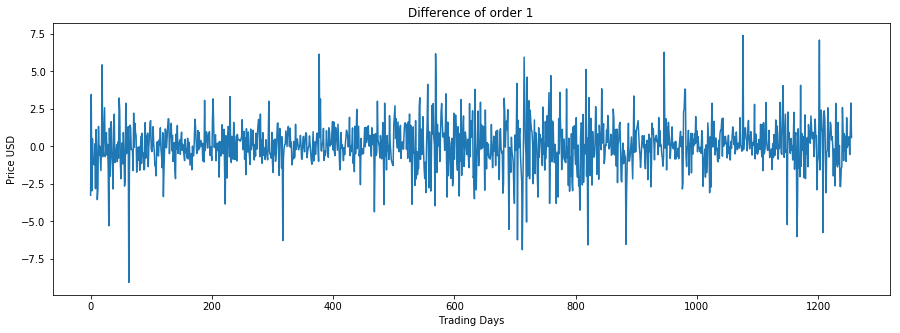

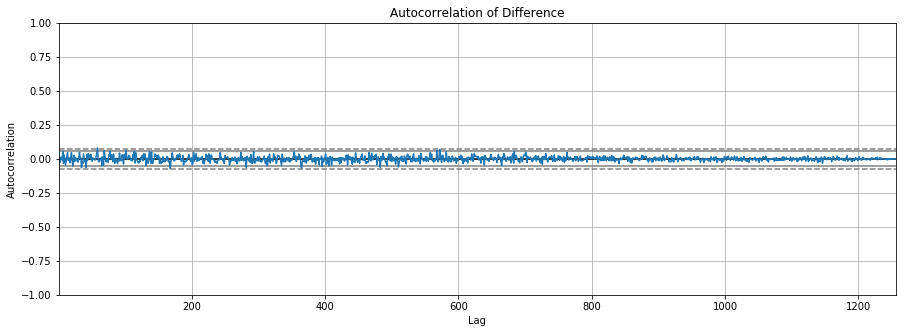

In [295]:
#
diff_values = my_stck['Close'][1:].values-my_stck['Close'][:-1].values
plt.title('Difference of order 1')
plt.plot(diff_values)
plt.ylabel('Price USD')
plt.xlabel('Trading Days')
plt.show()

acf_pl(diff_values)
plt.title('Autocorrelation of Difference')
plt.show()

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


                             ARIMA Model Results                              
Dep. Variable:               D2.Close   No. Observations:                  698
Model:                 ARIMA(1, 2, 2)   Log Likelihood               -1364.636
Method:                       css-mle   S.D. of innovations              1.701
Date:                Wed, 18 Oct 2017   AIC                           2739.271
Time:                        00:22:14   BIC                           2762.012
Sample:                    01-12-2015   HQIC                          2748.063
                         - 10-17-2017                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0004      0.000      1.103      0.271      -0.000       0.001
ar.L1.D2.Close    -0.9989      0.009   -110.281      0.000      -1.017      -0.981
ma.L1.D2.Close    -0.0004      0.011

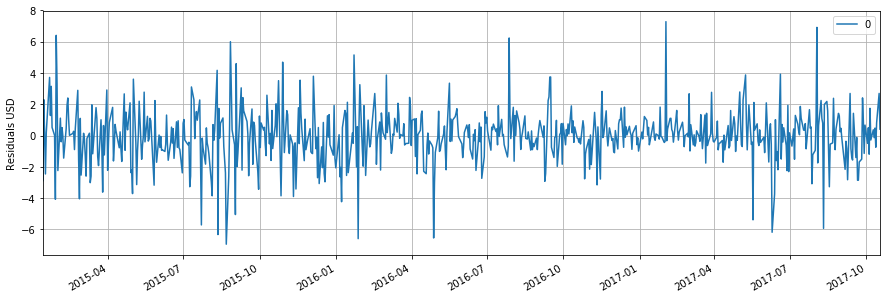

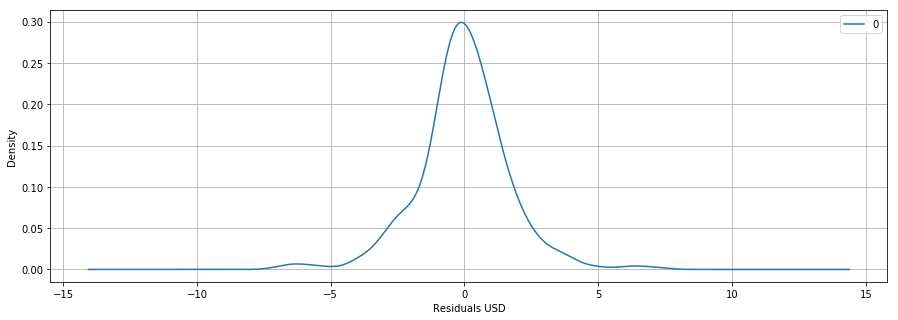

                0
count  698.000000
mean    -0.040310
std      1.713515
min     -6.943761
25%     -0.838769
50%     -0.020022
75%      0.833802
max      7.276535


In [306]:
#
from statsmodels.tsa.arima_model import ARIMA

# fit model
model = ARIMA(my_series, order=(1,2,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.grid()
plt.ylabel('Residuals USD')
plt.show()

residuals.plot(kind='kde')
plt.xlabel('Residuals USD')
plt.grid()
plt.show()
print(residuals.describe())

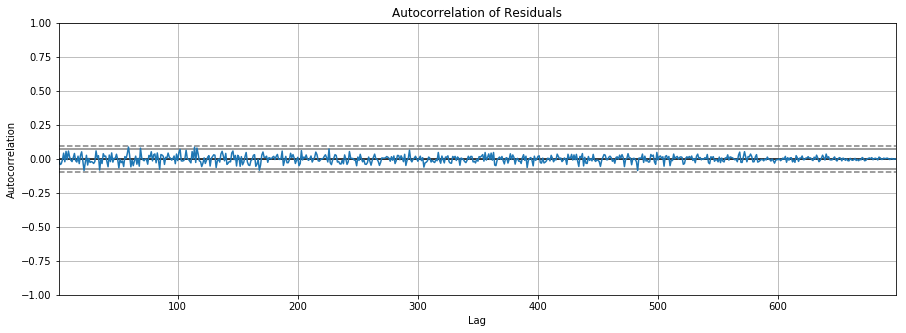

In [309]:
acf_pl(residuals)
plt.title('Autocorrelation of Residuals')
plt.show()

In [298]:
from sklearn.metrics import mean_squared_error

X = my_series.values
#size = int(len(X) * 0.66)
#train, test = X[0:size], X[size:len(X)]
size = len(X)-100
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(10,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=153.702266, expected=153.610000
predicted=153.714232, expected=153.670000
predicted=153.443595, expected=152.760000
predicted=153.001683, expected=153.180000


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=153.342269, expected=155.450000
predicted=155.562633, expected=153.930000
predicted=153.919151, expected=154.450000
predicted=154.446464, expected=155.370000
predicted=155.416905, expected=154.990000
predicted=155.072805, expected=148.980000
predicted=148.999731, expected=145.420000
predicted=145.742025, expected=146.590000
predicted=146.999651, expected=145.160000
predicted=145.508155, expected=144.290000
predicted=144.223430, expected=142.270000


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=142.165015, expected=146.340000
predicted=146.389123, expected=145.010000
predicted=144.532368, expected=145.870000
predicted=145.497506, expected=145.630000
predicted=145.282206, expected=146.280000
predicted=146.512286, expected=145.820000
predicted=145.562197, expected=143.730000
predicted=143.950750, expected=145.830000
predicted=145.793084, expected=143.680000
predicted=144.062566, expected=144.020000
predicted=143.955926, expected=143.500000
predicted=143.665523, expected=144.090000
predicted=144.157078, expected=142.730000
predicted=142.657055, expected=144.180000
predicted=144.317031, expected=145.060000
predicted=144.845904, expected=145.530000
predicted=145.690562, expected=145.740000
predicted=145.497777, expected=147.770000
predicted=147.943271, expected=149.040000
predicted=148.859145, expected=149.560000
predicted=149.685563, expected=150.080000
predicted=149.998793, expected=151.020000
predicted=151.272447, expected=150.340000
predicted=150.363160, expected=150

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=160.423845, expected=161.600000
predicted=161.649250, expected=160.950000
predicted=160.772263, expected=157.860000
predicted=158.408960, expected=157.500000
predicted=157.517631, expected=157.210000
predicted=157.556881, expected=159.780000
predicted=159.592010, expected=159.980000
predicted=160.054744, expected=159.270000
predicted=159.454736, expected=159.860000
predicted=159.859564, expected=161.470000
predicted=161.606771, expected=162.910000
predicted=162.585353, expected=163.350000
predicted=163.348052, expected=164.000000
predicted=164.021226, expected=164.050000
predicted=164.252743, expected=162.080000
predicted=162.205544, expected=161.910000
predicted=162.097786, expected=161.260000
predicted=161.538324, expected=158.630000
predicted=158.860224, expected=161.500000
predicted=161.793908, expected=160.860000
predicted=160.979175, expected=159.650000
predicted=159.609890, expected=158.280000
predicted=158.275258, expected=159.880000
predicted=160.097151, expected=158

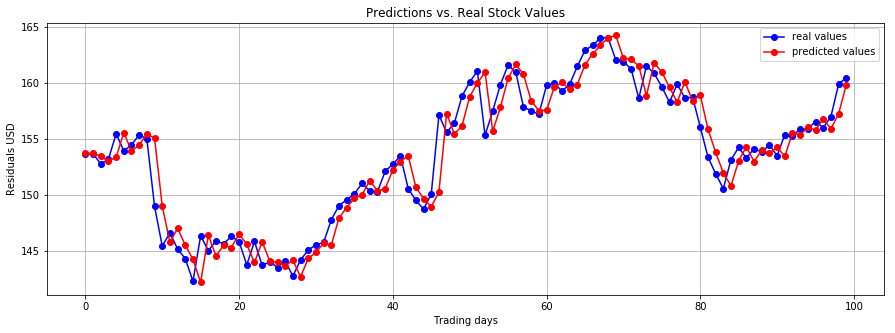

In [299]:
# plot
plt.subplots()
plt.plot(test, 'o-', color='b', label='real values')
plt.plot(predictions, 'o-', color='red', label='predicted values')
plt.title('Predictions vs. Real Stock Values')
plt.ylabel('Residuals USD')
plt.xlabel('Trading days')
plt.legend()
plt.grid()
plt.show()

In [300]:
def stock_variant(test_list):
    ans_ = test_list[1:]*100 - test_list[:-1]*100
    return np.sign(ans_*100)

test_var = stock_variant(np.array(test))
predict_var = stock_variant(np.array(predictions))

guesses = test_var*predict_var[0,:]
correctness = sum(guesses == 1)/(sum(guesses == 1)+sum(guesses == -1))*100

print('precision = %1.0f ' % (correctness))

precision = 56 
